<h1>Import</h1>

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from static_data import HAIRCUTS

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from datetime import datetime

from model.config import Config

from analysis_tools.compute_data import compute_funding_dataframe
from analysis_tools.loading_data import loading_data
from static_data import START_TIME, END_TIME
from strategy.max_function_rate_sec import MaxFundingRateSec
from strategy.best_gain import BestGain
from static_data import INVENTORY, INIT_QUANTITY, HAIRCUTS, INITIAL_PRICES


<h1>Process data</h1>

In [3]:
# STATIC DATA OVERRIDE 

In [4]:
INVENTORY = {
    'AAVEUSDT': 250_000,
    'BNBUSDT': 250_000,
    'BTCUSDT': 250_000,
    'DOGEUSDT': 250_000,
    'ETHUSDT': 250_000,
    'MASKUSDT': 250_000,
    'SOLUSDT': 250_000,
    'XRPUSDT': 250_000,
    'USDT': 500_000
}

INIT_QUANTITY = {
    'AAVEUSDT': 1922.0332850940665,
    'BNBUSDT': 717.5431323149536,
    'BTCUSDT': 5.58777512440152,
    'DOGEUSDT': 2502780.867630701,
    'ETHUSDT': 103.37728137337263,
    'MASKUSDT': 57231.34931322381,
    'SOLUSDT': 2204.996031007144,
    'XRPUSDT': 344631.85209211806,
    'USDT': 500_000
}

In [5]:
dataset = loading_data()

config = Config(
    dataset=dataset,
    start_date=datetime.strptime(START_TIME, "%d-%m-%Y"),
    end_date=datetime.strptime(END_TIME, "%d-%m-%Y"),
)

funding_df = compute_funding_dataframe(dataset, INVENTORY, INITIAL_PRICES)

<h1>Run Strategy</h1>

In [6]:
strat = BestGain(funding_df, config, INVENTORY, INIT_QUANTITY, HAIRCUTS)

In [7]:
strat.apply()

<h1>Visualisation of the result</h1>

In [8]:
strat.apply_stats()

PnL (with fees) 89102.07 $
           Fees 73636.78 $
            APY 3.56 %

************************* RECAP ****************************

      token potential_gain_usd  amount_invested APY_BY_TOKEN gain_with_fee  \
0  AAVEUSDT        4843.703235           250000     0.019375   2652.003373   
1   BNBUSDT        6796.517081           250000     0.027186   3721.199535   
2   BTCUSDT       12922.840834           250000     0.051691   7075.457728   
3  DOGEUSDT       29772.814191           250000     0.119091  16301.082012   
4   ETHUSDT       13046.332791           250000     0.052185   7143.071509   
5  MASKUSDT       20154.785141           250000     0.080619  11035.060489   
6   SOLUSDT       22432.961039           250000     0.089732  12282.397469   
7      USDT            43501.3           500000     0.087003   23817.64298   
8   XRPUSDT        9267.598777           250000      0.03707   5074.155461   

  APY_with_fee  
0     0.010608  
1     0.014885  
2     0.028302  
3     0.065

In [9]:
invested = strat.result.loc[(strat.result["ACTION"]=="INVESTED") & (strat.result["is_profitable"]==True)]

In [10]:
pnl_by_token = pd.pivot_table(data=invested, values='potential_gain_usd', index=["timestamp"], columns=["token"], aggfunc="sum", fill_value=0)
fee_by_token = pd.pivot_table(data=invested, values='fee_amount', index=["timestamp"], columns=["token"], aggfunc="sum", fill_value=0)

pnl_by_token.index = pd.to_datetime(pnl_by_token.index, format="%d-%m-%Y")

pnl_by_token

token,AAVEUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,MASKUSDT,SOLUSDT,USDT,XRPUSDT
timestamp,,,,,,,,,
2024-01-01 08:00:00,0.000000,0.000000,124.956550,0.000000,79.917271,98.402128,97.588720,249.775,102.713933
2024-01-01 16:00:00,134.905264,0.000000,0.000000,106.177086,108.475759,134.080786,154.613626,297.445,0.000000
2024-01-02 00:00:00,207.371226,0.000000,171.302466,143.487283,0.000000,0.000000,166.336071,394.205,162.433094
2024-01-02 08:00:00,190.233045,0.000000,133.686884,184.025025,0.000000,0.000000,208.708789,371.900,148.533648
2024-01-02 16:00:00,184.714934,0.000000,176.132496,188.727127,0.000000,0.000000,260.216543,484.005,192.023834
...,...,...,...,...,...,...,...,...,...
2024-04-11 00:00:00,0.000000,184.689856,0.000000,253.827417,38.604777,66.393356,116.029293,228.305,0.000000
2024-04-11 08:00:00,61.583393,0.000000,83.911486,169.072578,60.408137,0.000000,103.104338,151.225,0.000000
2024-04-11 16:00:00,26.483357,99.127744,81.423713,129.456162,0.000000,0.000000,117.676092,120.815,0.000000


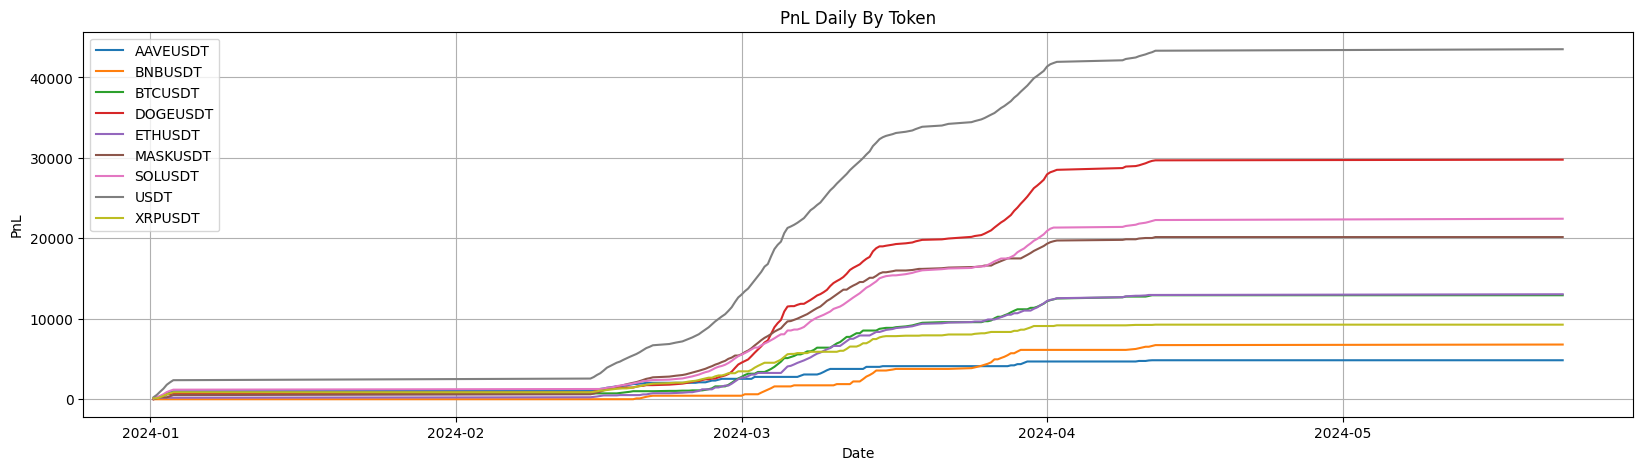

In [11]:
plt.figure(figsize=(20, 5))
for col in pnl_by_token.columns.tolist():
    plt.plot(pnl_by_token.index, pnl_by_token[col].cumsum(), label=col)
plt.title('PnL Daily By Token')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.grid(True) 
plt.show()

In [12]:
pnl_by_token["TOTAL"] = pnl_by_token.apply(lambda x: sum(x), axis=1)

In [13]:
fee_by_token["TOTAL"] = fee_by_token.apply(lambda x: sum(x), axis=1)

In [14]:
fee_by_token

token,AAVEUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,MASKUSDT,SOLUSDT,USDT,XRPUSDT,TOTAL
timestamp,,,,,,,,,,
2024-01-01 08:00:00,0.000000,0.000000,416.934761,0.000000,416.934761,416.934761,416.934761,416.934761,416.934761,2501.608565
2024-01-01 16:00:00,425.839623,0.000000,0.000000,425.839623,425.839623,425.839623,425.839623,425.839623,0.000000,2555.037740
2024-01-02 00:00:00,432.094209,0.000000,432.094209,432.094209,0.000000,0.000000,432.094209,432.094209,432.094209,2592.565253
2024-01-02 08:00:00,437.703140,0.000000,437.703140,437.703140,0.000000,0.000000,437.703140,437.703140,437.703140,2626.218838
2024-01-02 16:00:00,429.482797,0.000000,429.482797,429.482797,0.000000,0.000000,429.482797,429.482797,429.482797,2576.896782
...,...,...,...,...,...,...,...,...,...,...
2024-04-11 00:00:00,0.000000,581.096893,0.000000,581.096893,581.096893,581.096893,581.096893,581.096893,0.000000,3486.581358
2024-04-11 08:00:00,597.000419,0.000000,597.000419,597.000419,597.000419,0.000000,597.000419,597.000419,0.000000,3582.002515
2024-04-11 16:00:00,571.489893,571.489893,571.489893,571.489893,0.000000,0.000000,571.489893,571.489893,0.000000,3428.939356


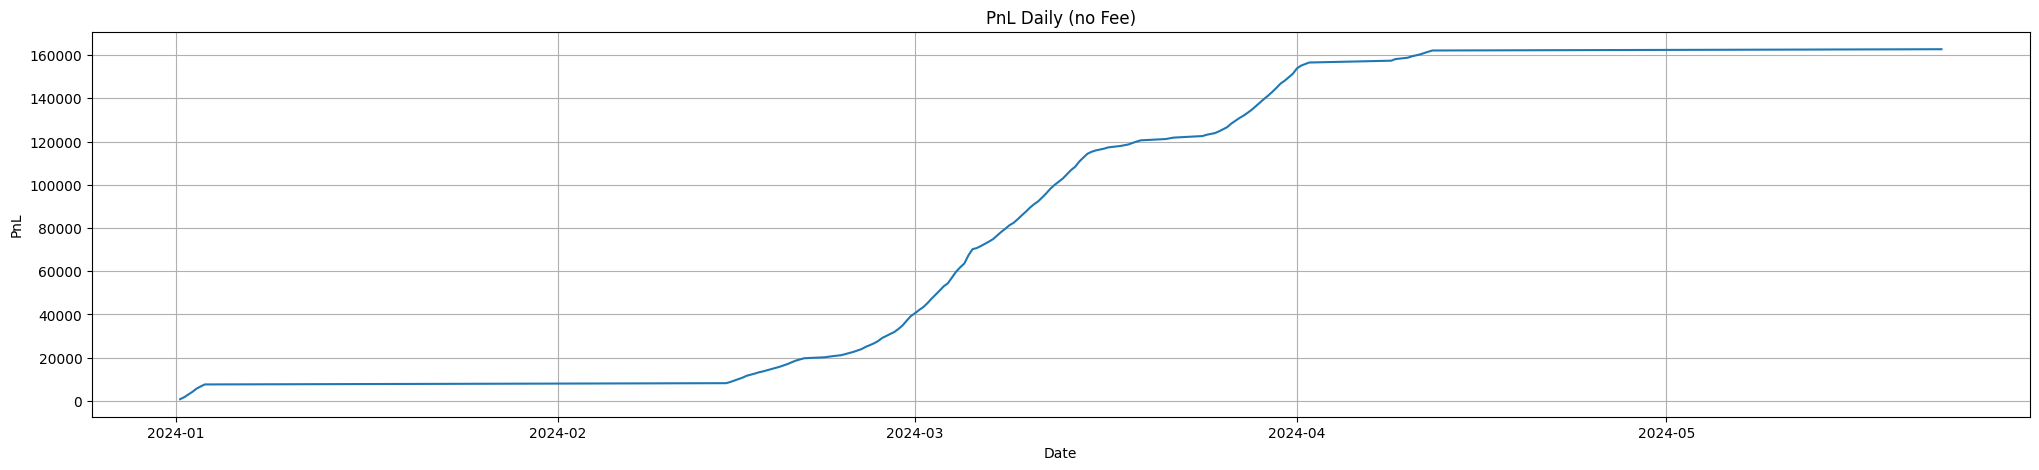

In [15]:
plt.figure(figsize=(25, 5))
plt.plot(pnl_by_token.index, pnl_by_token['TOTAL'].cumsum())
plt.title('PnL Daily (no Fee)')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.grid(True)
plt.show()

In [16]:
result = strat.result

In [17]:
invested = pd.pivot_table(data=result.loc[result["ACTION"]=="INVESTED"], values='collateral_needed_usd', index=["timestamp"], columns=["ACTION"], aggfunc="sum", fill_value=0)

In [18]:
posted = pd.pivot_table(data=result.loc[result["ACTION"]=="POSTED"], values='collateral_value_usd', index=["timestamp"], columns=["ACTION"], aggfunc="sum", fill_value=0)

In [19]:
collateral_management = pd.merge(invested.reset_index(), posted.reset_index(), on="timestamp", how="inner")

In [20]:
collateral_management["ratio collateralization (%)"] = collateral_management["INVESTED"] / collateral_management["POSTED"]

In [21]:
collateral_management

ACTION,timestamp,INVESTED,POSTED,ratio collateralization (%)
0,2024-01-01 08:00:00,1.755075e+06,2.194108e+06,0.799904
1,2024-01-01 16:00:00,1.773077e+06,2.258531e+06,0.785058
2,2024-01-02 00:00:00,1.804440e+06,2.286597e+06,0.789138
3,2024-01-02 08:00:00,1.826857e+06,2.317216e+06,0.788384
4,2024-01-02 16:00:00,1.798326e+06,2.268196e+06,0.792844
...,...,...,...,...
450,2024-05-30 08:00:00,2.429110e+06,2.575022e+06,0.943335
451,2024-05-30 16:00:00,2.469400e+06,2.617083e+06,0.943570
452,2024-05-31 00:00:00,2.440184e+06,2.613585e+06,0.933654
453,2024-05-31 08:00:00,2.224139e+06,3.135421e+06,0.709359


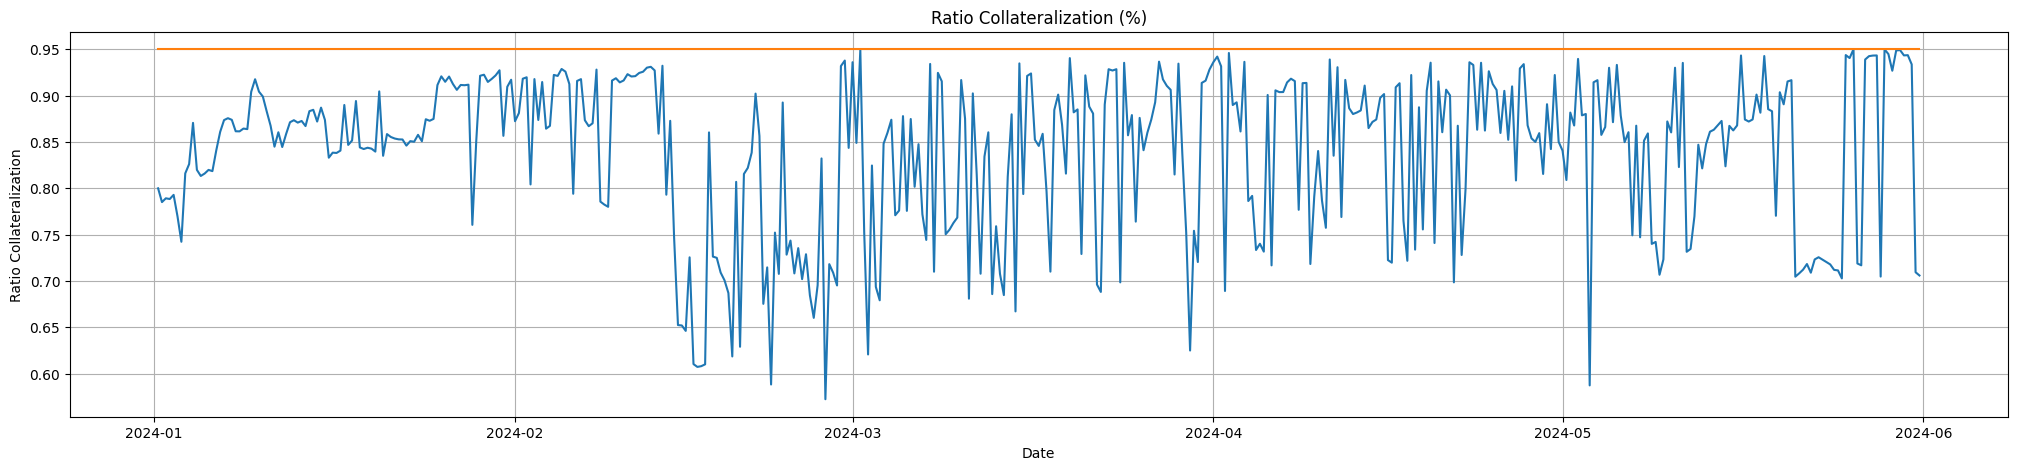

In [22]:
plt.figure(figsize=(25, 5))
plt.plot(collateral_management.timestamp, collateral_management['ratio collateralization (%)'], label="collateral used")
plt.plot(collateral_management.timestamp, [0.95 for _ in collateral_management.timestamp], label="buffer")
plt.title('Ratio Collateralization (%)')
plt.xlabel('Date')
plt.ylabel('Ratio Collateralization')
plt.grid(True)
plt.show()

In [23]:
recap = strat.recap

In [24]:
pnl = recap["pnl_by_token"]

In [25]:
pnl["gain_with_fee"] = (recap["pnl_with_fee"] / pnl["potential_gain_usd"].sum()) * (pnl["potential_gain_usd"])

In [26]:
pnl["apy_with_fee"] = pnl["gain_with_fee"] / pnl["amount_invested"]

In [27]:
pnl

,token,potential_gain_usd,amount_invested,APY_BY_TOKEN,gain_with_fee,APY_with_fee,apy_with_fee
0,AAVEUSDT,4843.703235,250000,0.019375,2652.003373,0.010608,0.010608
1,BNBUSDT,6796.517081,250000,0.027186,3721.199535,0.014885,0.014885
2,BTCUSDT,12922.840834,250000,0.051691,7075.457728,0.028302,0.028302
3,DOGEUSDT,29772.814191,250000,0.119091,16301.082012,0.065204,0.065204
4,ETHUSDT,13046.332791,250000,0.052185,7143.071509,0.028572,0.028572
5,MASKUSDT,20154.785141,250000,0.080619,11035.060489,0.04414,0.04414
6,SOLUSDT,22432.961039,250000,0.089732,12282.397469,0.04913,0.04913
7,USDT,43501.3,500000,0.087003,23817.64298,0.047635,0.047635
8,XRPUSDT,9267.598777,250000,0.03707,5074.155461,0.020297,0.020297


<h1>What is the maximum APY you would pay for this CL if you need to agree the rate the 1st of every month?  
</h1>

In [28]:
result = strat.result.loc[(strat.result["is_profitable"]==True) & (strat.result["ACTION"]=="INVESTED")]

In [29]:
result["month"] = pd.to_datetime(result["timestamp"]).dt.strftime("%m")

/var/folders/mf/4zbz609n7k17zncwm25j1gsw0000gn/T/ipykernel_11189/2538308123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["month"] = pd.to_datetime(result["timestamp"]).dt.strftime("%m")


In [30]:
res = pd.pivot_table(data=result, values='potential_gain_usd', index=["month"], columns=[], aggfunc="sum", fill_value=0)
fee = pd.pivot_table(data=result.drop_duplicates(subset=['timestamp']), values='fee_amount', index=["month"], columns=[], aggfunc="sum", fill_value=0)

In [31]:
res.reset_index(inplace=True)
fee.reset_index(inplace=True)

In [32]:
def apply_date_month(row):
    if row == "01": return "january"
    if row == "02": return "february"
    if row == "03": return "march"
    if row == "04": return "april"
    if row == "05": return "may"


In [33]:
res["month"] = res["month"].apply(apply_date_month)
fee["month"] = fee["month"].apply(apply_date_month)

In [34]:
res = res.pivot_table(index="month", values="potential_gain_usd", aggfunc="sum")
fee = fee.pivot_table(index="month", values="fee_amount", aggfunc="sum")

In [35]:
table = res.reset_index().merge(fee.reset_index(), how="inner", on="month")

In [36]:
table["pnl_monthly"] = table["potential_gain_usd"] - table["fee_amount"]

In [37]:
table["apy"] = table["pnl_monthly"] / 2_500_000 * 100

In [38]:
table["apy"].sum() / 5

np.float64(0.7128165644510436)

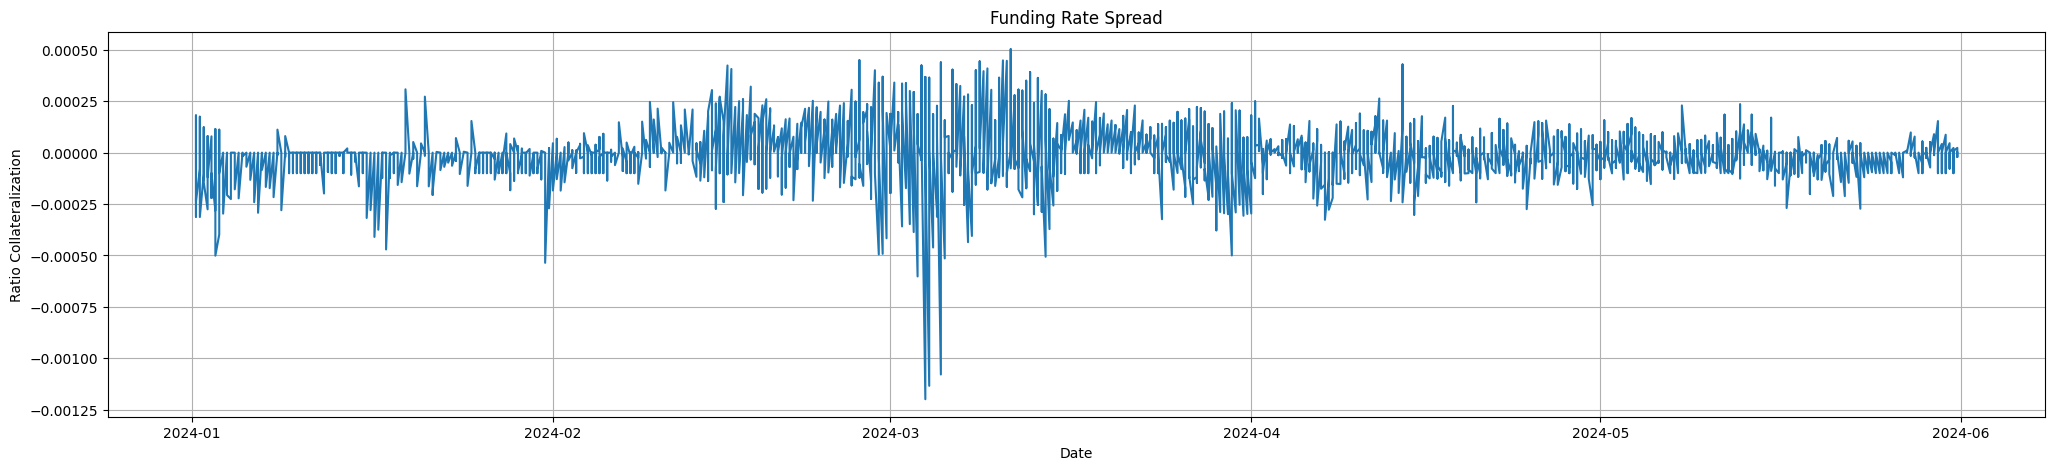

In [39]:
plt.figure(figsize=(25, 5))
plt.plot(strat.result["timestamp"], strat.result["funding_rate_binance"]-strat.result["funding_rate_bybite"], label="funding rate spread")
plt.title('Funding Rate Spread')
plt.xlabel('Date')
plt.ylabel('Ratio Collateralization')
plt.grid(True)
plt.show()

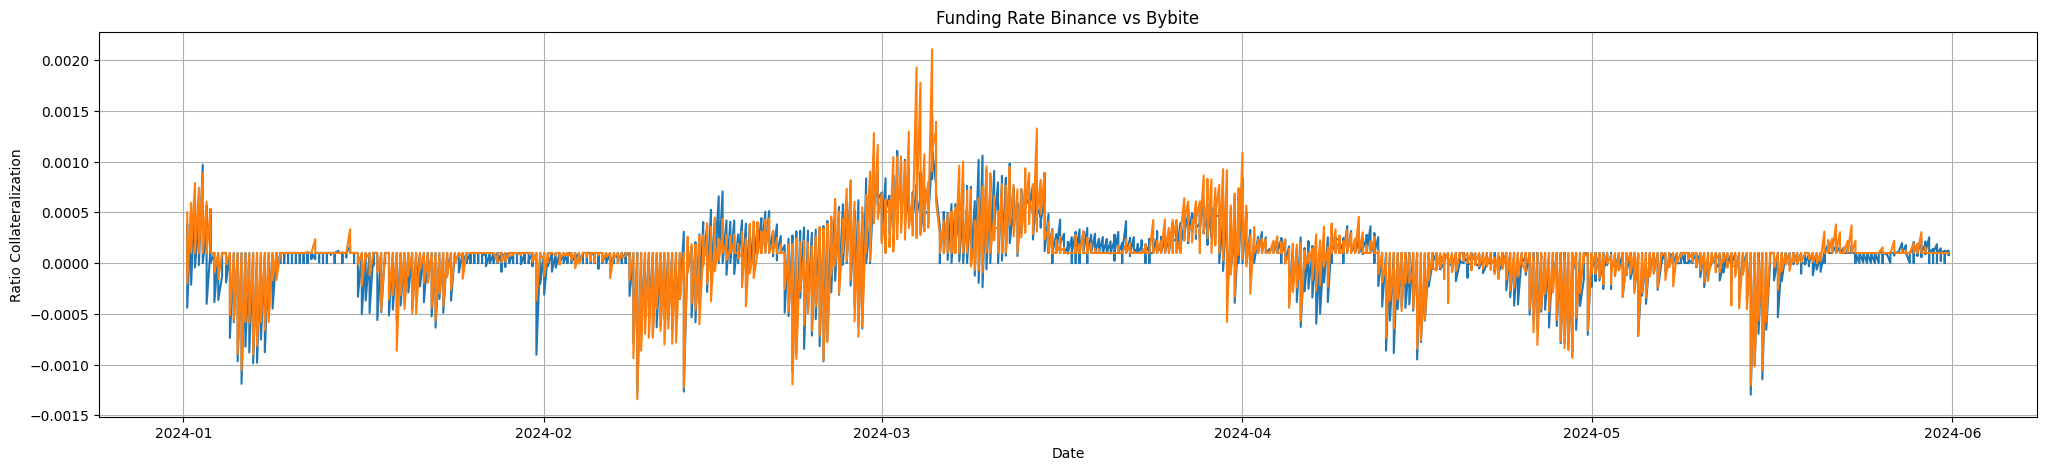

In [40]:
plt.figure(figsize=(25, 5))
plt.plot(strat.result["timestamp"], strat.result["funding_rate_binance"], label="funding rate binance")
plt.plot(strat.result["timestamp"], strat.result["funding_rate_bybite"], label="funding rate bybite")
plt.title('Funding Rate Binance vs Bybite')
plt.xlabel('Date')
plt.ylabel('Ratio Collateralization')
plt.grid(True)
plt.show()

<h1>Question 2</h1>

In [41]:
INVENTORY = {
    'BTCUSDT': 425_035.0,
    'ETHUSDT': 229_741.0,
    'USDT': 1_000_000
}

INIT_QUANTITY = {
    'BTCUSDT': 10.0,
    'ETHUSDT': 100.0,
    'USDT': 1_000_000
}

In [42]:
dataset = loading_data()
config = Config(
    dataset=dataset,
    start_date=datetime.strptime(START_TIME, "%d-%m-%Y"),
    end_date=datetime.strptime(END_TIME, "%d-%m-%Y"),
)
funding_df = compute_funding_dataframe(dataset, INVENTORY, INITIAL_PRICES)
strat = BestGain(funding_df, config, INVENTORY, INIT_QUANTITY, HAIRCUTS)

In [43]:
strat.apply()

In [44]:
strat.apply_stats()

PnL (with fees) 56216.99 $
           Fees 48148.74 $
            APY 3.40 %

************************* RECAP ****************************

     token potential_gain_usd  amount_invested APY_BY_TOKEN gain_with_fee  \
0  BTCUSDT         226.902104         425035.0     0.000534     122.22166   
1  ETHUSDT       16599.669879         229741.0     0.072254   8941.473769   
2     USDT           87539.16        1000000.0     0.087539  47153.293325   

  APY_with_fee  
0     0.000288  
1      0.03892  
2     0.047153  


In [45]:
strat.recap

{'pnl_with_fee': np.float64(56216.988754181795),
 'apy_with_fee': np.float64(3.4000000000000004),
 'fee_amount': np.float64(48148.74322819824),
 'pnl_by_token':      token potential_gain_usd  amount_invested APY_BY_TOKEN gain_with_fee  \
 0  BTCUSDT         226.902104         425035.0     0.000534     122.22166   
 1  ETHUSDT       16599.669879         229741.0     0.072254   8941.473769   
 2     USDT           87539.16        1000000.0     0.087539  47153.293325   
 
   APY_with_fee  
 0     0.000288  
 1      0.03892  
 2     0.047153  }

In [46]:
3.4/(30*5)

0.022666666666666665